<h1>Importing the datasets</h1>

In [1]:
import pandas as pd
import numpy as np

df_train = pd.read_csv(r'C:\Users\Legion\Desktop\Python\Datasets\Australia Forecast\Weather Training Data.csv')
df_test = pd.read_csv(r'C:\Users\Legion\Desktop\Python\Datasets\Australia Forecast\Weather Test Data.csv')
df = pd.concat([df_train,df_test])

df.reset_index(inplace = True)
df.drop('index',axis = 'columns',inplace = True)
df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0


<h1>Cleaning the dataset</h1>
    
<p1>At first, we drop the 'row ID' and 'RainToday' column because obviously this values won't help us by training our model and also it would damage the model if we want to fill the missing values in the RainToday column</p>

In [2]:
df.drop(['row ID','RainToday'],axis = 'columns', inplace = True)

<p>So now we want to take a look at NaN values and see how many missing data we have in our dataset</p>

In [3]:
df.isna().sum().sort_values(ascending = False)

Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
RainTomorrow     42677
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
Location             0
dtype: int64

<h3>Handling the missing data</h3>

<p>At first insight, we can observe, in the first few columns, we have a large portion of the data labeled as missing<p>
<p> But let's take a closer view to the dataset and calculate the percentage of the missing data on the whole dataset</p>

In [4]:
percent = (df.isna().sum()/df.isna().count())*100
percent = percent.sort_values(ascending = False)
total = df.isna().sum().sort_values(ascending = False)

df_insight = pd.concat([total,percent],keys = ['Total','Percentage'],axis = 1)
df_insight['Percentage'] = df_insight['Percentage'].apply(lambda x: round(x,2) )
df_insight

,Total,Percentage
Sunshine,67816,47.69
Evaporation,60843,42.79
Cloud3pm,57094,40.15
Cloud9am,53657,37.74
RainTomorrow,42677,30.01
Pressure9am,14014,9.86
Pressure3pm,13981,9.83
WindDir9am,10013,7.04
WindGustDir,9330,6.56
WindGustSpeed,9270,6.52


<p>So it means that in the first two columns, we have more than 40% of the data missing, even by filling them with any strategy it could harm the model we would like to train later, so it's much more like than a tradeoff and we're going to drop them</p>

In [5]:
df.drop(['Sunshine','Evaporation'],axis = 'columns', inplace = True)

In [6]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0
3,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,0.0
4,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,0.0


<h3>Transforming the categorical values to numericals and filling the NaN or missing values</h3>

<p>Now we would like to transform the categorical columns to numerical one. We are going to do so with make_column_transformer and SimpleImputer </p>

In [7]:
#printing out the categorical columns
categorical = df.select_dtypes(include = 'object').columns
print('Categorical Columns:',' | '.join(categorical))

print('_________________________________')

numerical = df.select_dtypes(include = 'float64').columns
print('Numerical Columns:',' | '.join(numerical))

Categorical Columns: Location | WindGustDir | WindDir9am | WindDir3pm
_________________________________
Numerical Columns: MinTemp | MaxTemp | Rainfall | WindGustSpeed | WindSpeed9am | WindSpeed3pm | Humidity9am | Humidity3pm | Pressure9am | Pressure3pm | Cloud9am | Cloud3pm | Temp9am | Temp3pm | RainTomorrow


<p>Here we fill the NaN and missing values, we first choose the strategy depending on the numerical or categorical values of data and let them be transformed</p>

In [8]:
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = 'most_frequent')
ct = make_column_transformer((imp,categorical),
                             (SimpleImputer(strategy = 'median'),numerical),
                            remainder = 'passthrough')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer-1',
                                 SimpleImputer(strategy='most_frequent'),
                                 Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='median'),
                                 Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainTomorrow'],
      dtype='object'))])

<p>Here we fit and transform the data and update the dataframe </p>

In [9]:
c,n = np.asarray(categorical),np.asarray(numerical)
transformed = ct.fit_transform(df)
df = pd.DataFrame(transformed,columns = np.concatenate((c,n)))
df.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,Albury,W,W,WNW,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0
1,Albury,WNW,NNW,WSW,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0
2,Albury,W,ENE,NW,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0
3,Albury,WNW,W,W,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0.0
4,Albury,W,SSE,W,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0.0


<h3>Checking if there is still some missing data</h3>

<p>We would like to make sure that there is no missing data</p>

In [10]:
def check_nan():
    for count in df.isna().sum():
        if count>0:
            return ('There is still some missing values')
        
        return ("There isn't any missing data in the dataset")
    
check_nan()

"There isn't any missing data in the dataset"

In [11]:
from sklearn.preprocessing import LabelEncoder

for column in categorical:
    df[column] = LabelEncoder().fit_transform(df[column])
#     print(df[column])
    
df.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2,13,13,14,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0
1,2,14,6,15,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0
2,2,13,1,7,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0
3,2,14,13,13,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0.0
4,2,13,10,13,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0.0


In [12]:
obj_col = df.select_dtypes(include = 'object')
for column in obj_col:
    df[column] = df[column].astype('float64')

<h2>Correlation Matrix</h2>

Now we plot the correlation matrix which is useful to know what features are the most relevant to the target set which is 'RainTomorrow'

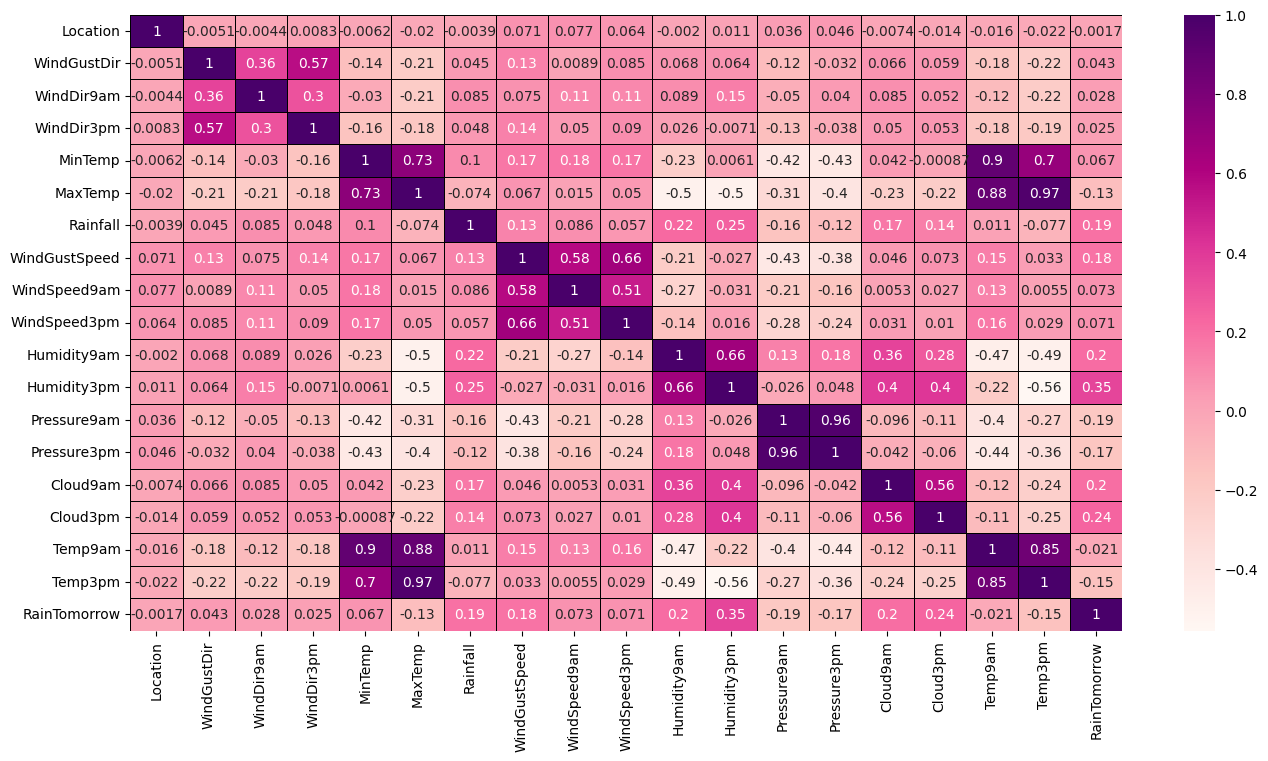

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(),cmap = 'RdPu',annot = True,linewidth = 0.5,linecolor = 'black')
plt.show()

<h3>Selecting the appropriate features for our model</h3>

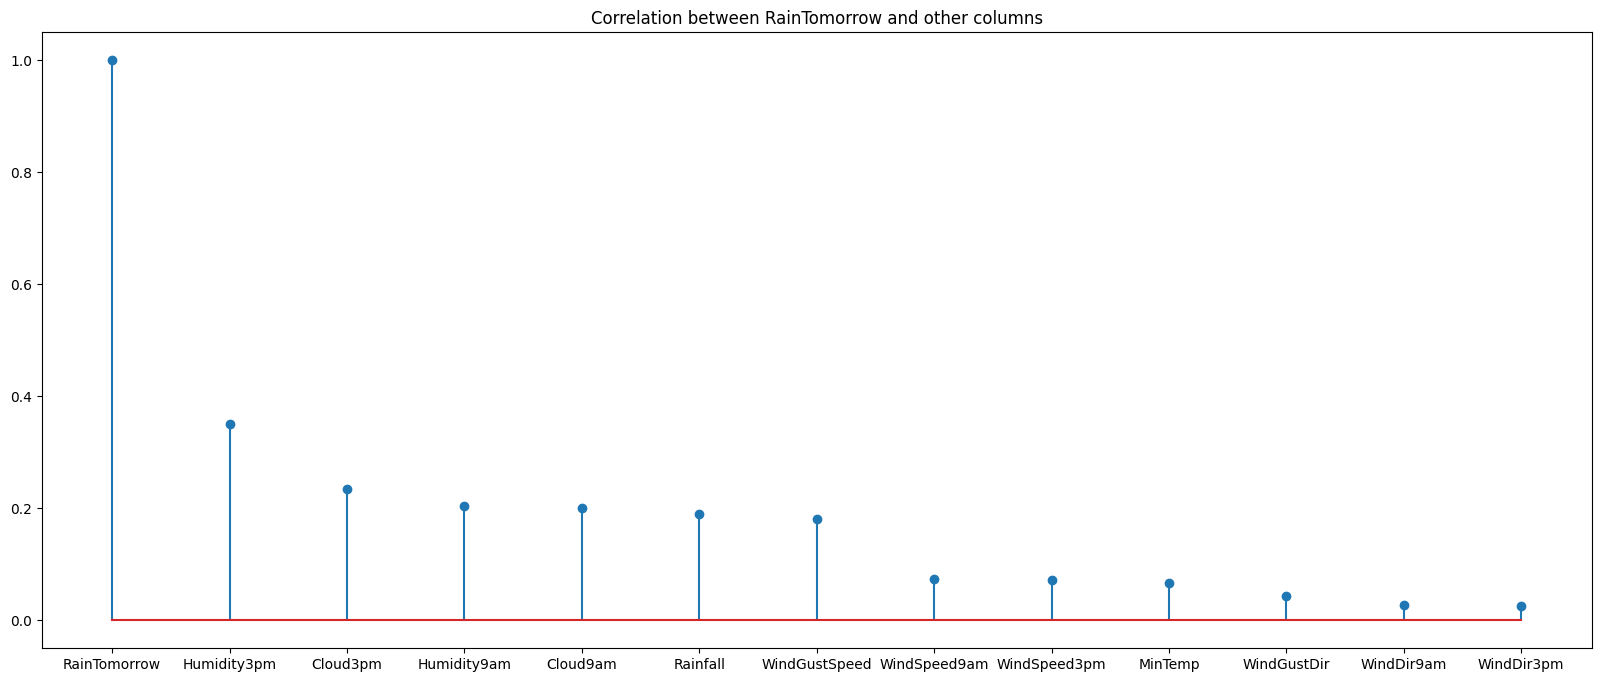

In [14]:
ax = plt.figure(figsize=(20, 8))

info = dict(df.corr()['RainTomorrow'].sort_values(ascending = False))
info = {key:info[key] for key in info if info[key]>0}
# print(info)

plt.title('Correlation between RainTomorrow and other columns')
plt.stem(info.keys(),info.values())
plt.show()

<h2>Spliting the dataset into train and test sets</h2>

So now we define our train set and we would like to use the most relevant features to target feature

In [15]:
from sklearn.model_selection import train_test_split

X,y = df[[key for key in info.keys() if key!='RainTomorrow']],df['RainTomorrow']
xtrain,xtest, ytrain,ytest = train_test_split(X,y,shuffle = True, test_size = 0.25,random_state = 101)

<h3>Scaling our train and test feature with MinMaxScaler</h3>

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

<h2>Deploying ML Models</h2>

because of the property of our target set, we use classification algorithms such as RandomForestClassifier and GradientBoostingClassifier

<h3>RandomForestClassifier</h3>

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 17,criterion = 'gini')
rfc.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=17)

<h2>Accuracy</h2>

In [18]:
from sklearn.metrics import accuracy_score

ypred_rfc = rfc.predict(xtest)
ypred_t_rfc = rfc.predict(xtrain)

print('Test set accuracy is:',accuracy_score(ytest,ypred_rfc))
print('Train set accuracy is:',accuracy_score(ytrain,ypred_t_rfc))

Test set accuracy is: 0.8550732791358406
Train set accuracy is: 0.9524680244551967


<h2>Confusion Matrix</h2>

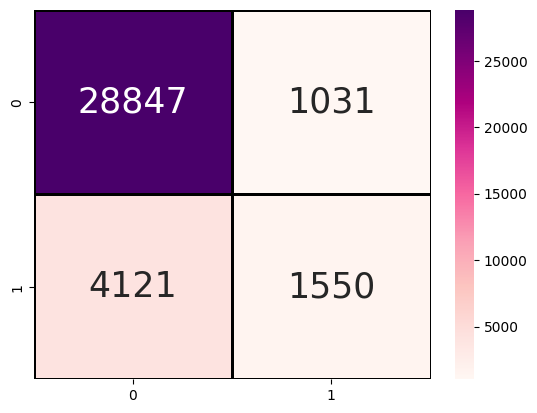

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred_rfc)
cm = pd.DataFrame(cm)
sns.heatmap(cm,annot = True,linewidth = 1,linecolor = 'black',cmap = 'RdPu',fmt = 'g',annot_kws = {'size':25})
plt.show()

<h3>GradientBoostingClassifier</h3>

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(loss = 'log_loss',learning_rate = 0.07,max_depth = 10)

gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.07, max_depth=10)

<h2>Accuracy</h2>

In [21]:
ypred_gbc = gbc.predict(xtest)
ypred_t_gbc = gbc.predict(xtrain)

print('Test set accuracy is:',accuracy_score(ytest,ypred_gbc))
print('Train set accuracy is:',accuracy_score(ytrain,ypred_t_gbc))

Test set accuracy is: 0.8527103434695772
Train set accuracy is: 0.9251059600165035


<h2>Confusion Matrix</h2>

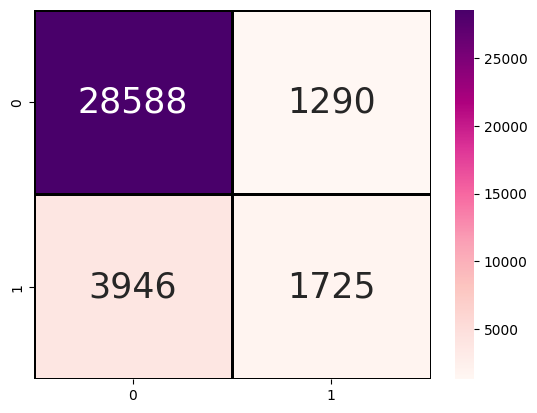

In [22]:
cm = confusion_matrix(ytest,ypred_gbc)
cm = pd.DataFrame(cm)
sns.heatmap(cm,annot = True,linewidth = 1,linecolor = 'black',cmap = 'RdPu',fmt = 'g',annot_kws = {'size':25})
plt.show()

<h3>Neural Network</h3>

In [23]:
import tensorflow.keras as kr

num = len(info.keys())-1
model = kr.Sequential()

#input layer
model.add(kr.layers.Dense(num,activation = 'ReLU'))

#hidden layers
model.add(kr.layers.Dense(num,activation = 'ReLU'))
model.add(kr.layers.Dense(num,activation = 'ReLU'))
model.add(kr.layers.Dense(num,activation = 'ReLU'))

#output layer
model.add(kr.layers.Dense(1,activation = 'ReLU'))

model.compile(optimizer = 'adam',loss = 'mse')

hist = model.fit(xtrain,ytrain,
                 batch_size = 2048,
                 epochs = 40)

Epoch 1/40
53/53 [==============================] - 1s 1ms/step - loss: 0.1330
Epoch 2/40
53/53 [==============================] - 0s 1ms/step - loss: 0.1178
Epoch 3/40
53/53 [==============================] - 0s 1000us/step - loss: 0.1106
Epoch 4/40
53/53 [==============================] - 0s 1ms/step - loss: 0.1080
Epoch 5/40
53/53 [==============================] - 0s 1ms/step - loss: 0.1072
Epoch 6/40
53/53 [==============================] - 0s 1ms/step - loss: 0.1066
Epoch 7/40
53/53 [==============================] - 0s 1ms/step - loss: 0.1062
Epoch 8/40
53/53 [==============================] - 0s 1ms/step - loss: 0.1061
Epoch 9/40
53/53 [==============================] - 0s 1ms/step - loss: 0.1057
Epoch 10/40
53/53 [==============================] - 0s 1ms/step - loss: 0.1055
Epoch 11/40
53/53 [==============================] - 0s 1ms/step - loss: 0.1054
Epoch 12/40
53/53 [==============================] - 0s 981us/step - loss: 0.1053
Epoch 13/40
53/53 [=========================

<h2>Confusion Matrix</h2>

1111/1111 [==============================] - 1s 484us/step


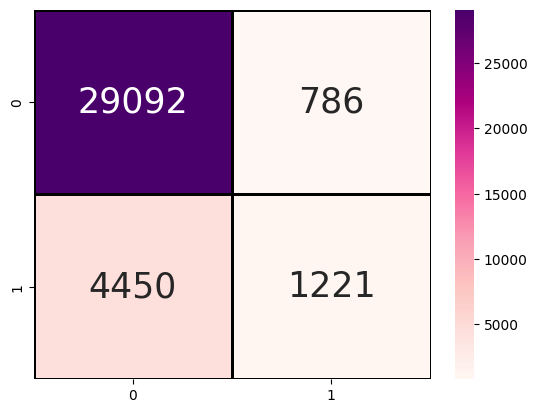

In [24]:
cm = confusion_matrix(ytest,model.predict(xtest).round())
cm = pd.DataFrame(cm)
sns.heatmap(cm,annot = True,linewidth = 1,linecolor = 'black',cmap = 'RdPu',fmt = 'g',annot_kws = {'size':25})
plt.show()

<h2>Accuracy</h2>

In [25]:
print('Model accuracy on train set is:',accuracy_score(ytrain,model.predict(xtrain).round()))
print('Model accuracy on test set is:',accuracy_score(ytest,model.predict(xtest).round()))

3333/3333 [==============================] - 2s 456us/step
Model accuracy on train set is: 0.8558756235700087
1111/1111 [==============================] - 1s 471us/step
Model accuracy on test set is: 0.8527103434695772


<h2>Losses vs Epoches</h2>

as it is seen below, in our neural network model the more Epoches, the less the Loss value would be

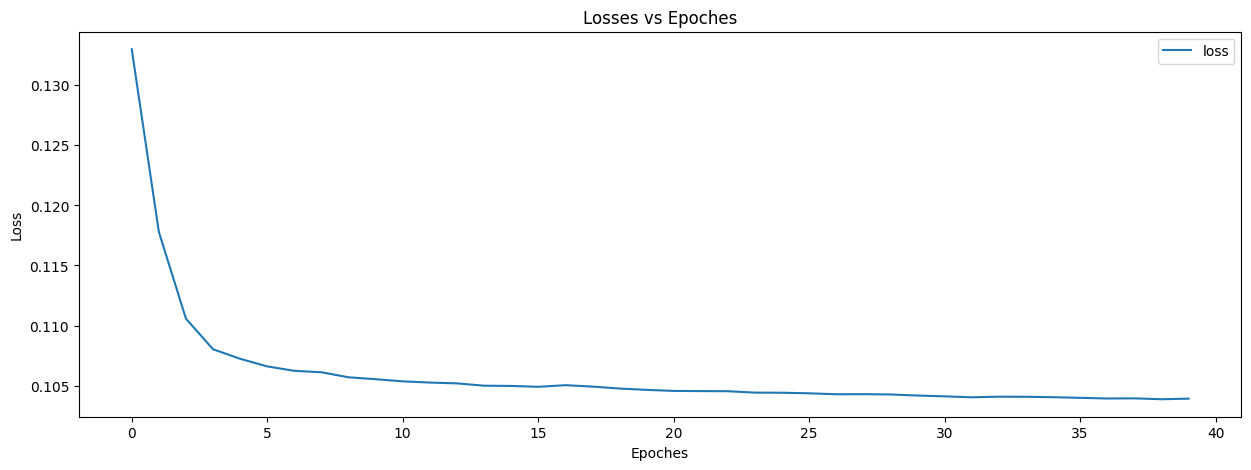

In [26]:
plt.figure(figsize = (15,5))

sns.lineplot(data = hist.history,color = 'red')
# sns.despine()

plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.title('Losses vs Epoches')
plt.show()

<h1>Models and the accuracy score obtained by them</h1>

3333/3333 [==============================] - 2s 476us/step


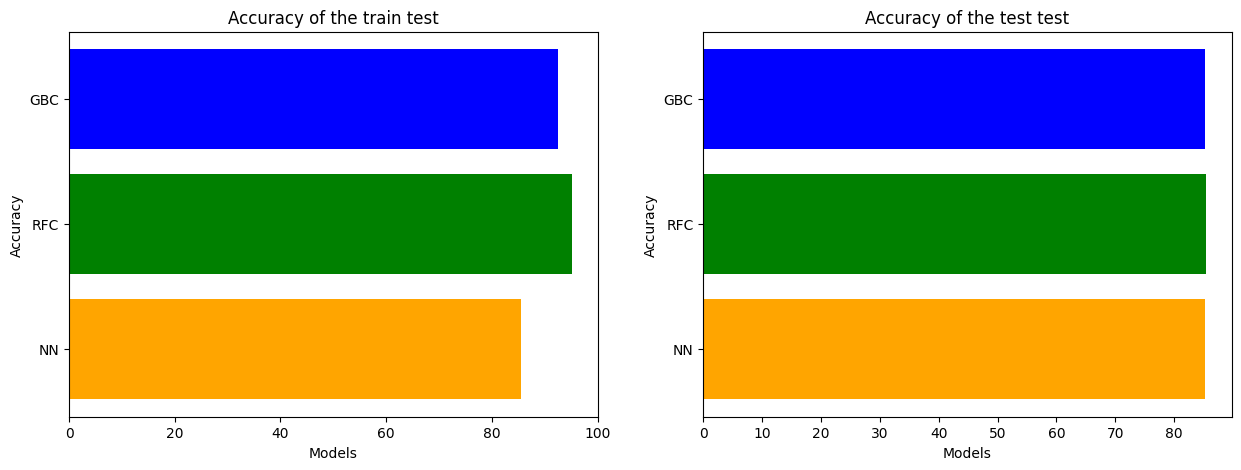

In [27]:
import warnings
warnings.filterwarnings('ignore')

f,axes = plt.subplots(1,2,figsize = (15,5))

models = {'NN':model,"RFC":rfc,'GBC':gbc}
axes[1].barh(list(models.keys()),[accuracy_score(ytest,model_.predict(xtest).round())*100 for model_ in models.values()],
        color = ['orange','green','blue'])

axes[1].set(xlabel = 'Models', ylabel = 'Accuracy',title = 'Accuracy of the test test')

axes[0].barh(list(models.keys()),[accuracy_score(ytrain,model_.predict(xtrain).round())*100 for model_ in models.values()],
        color = ['orange','green','blue'])

axes[0].set(xlabel = 'Models', ylabel = 'Accuracy',title = 'Accuracy of the train test')

plt.show()

<h1>Conclusion</h1>

we deployed 3 diffent ML models and as it can be looked, all 3 models have about 85% accuracy <i>on the test set</i>. But overall, we can conclude than the RandomForetClassifier has been the best,both on the <i>train set</i> and on the <i>test set</i>